In [1]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
path = '/content/drive/MyDrive/Proyecto Introduccion a la Ciencia de Datos/output'

In [9]:
df = pd.read_csv(f'{path}/dataset.csv')

In [ ]:
df

,sector,pmc,ccmc,ap,bps,ac,ingpc_mean
0,Abel Gilbert,341.420856,0.000000e+00,3000.000000,1.866667,0.0,186.582404
1,Acacias,507.023203,0.000000e+00,245.000000,2.200000,1.0,297.917603
2,Alborada,819.085921,4.157044e-06,389.192825,2.066910,113.0,422.237240
3,Argelia,435.426671,4.232569e-07,1660.279070,2.155340,9.0,191.006255
4,Atarazana,857.244304,1.251978e-06,617.601790,2.236542,19.0,553.194133
...,...,...,...,...,...,...,...
56,Sauces,686.392528,9.823048e-07,295.268797,2.230769,10.0,364.891111
57,Solanda,517.208887,2.739629e-06,451.052632,2.456140,3.0,234.612433
58,Turubamba,542.188739,1.692989e-06,540.645161,2.450331,4.0,270.232101
59,Urdenor,936.585279,7.700748e-06,401.451220,2.317406,12.0,434.587815


In [10]:
corr = df.corr()

In [11]:
corr

,pmc,ccmc,ap,bps,ac,ingpc_mean
pmc,1.000000,0.413770,-0.249946,-0.353183,0.591354,0.757720
ccmc,0.413770,1.000000,-0.060039,-0.254357,0.230999,0.399968
ap,-0.249946,-0.060039,1.000000,0.313386,-0.052119,-0.148670
bps,-0.353183,-0.254357,0.313386,1.000000,-0.268798,-0.239870
ac,0.591354,0.230999,-0.052119,-0.268798,1.000000,0.626836
ingpc_mean,0.757720,0.399968,-0.148670,-0.239870,0.626836,1.000000


In [17]:
sns.set_theme(style='darkgrid')

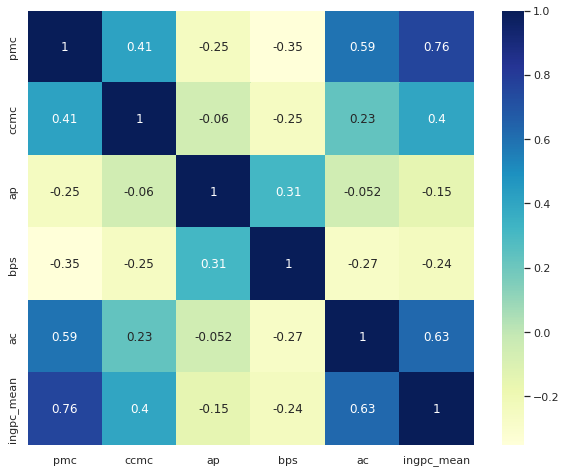

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
_ = sns.heatmap(corr, cmap="YlGnBu", annot=True, ax=ax)

In [ ]:
X = df[['pmc', 'ac']]
y = df['ingpc_mean']

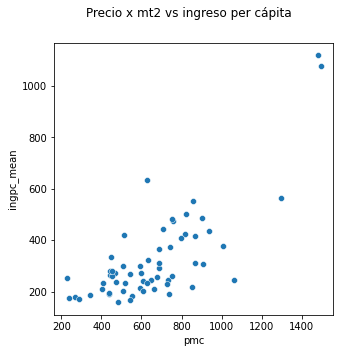

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
_ = sns.scatterplot(data=df, x='pmc', y='ingpc_mean', ax=ax)
_ = fig.suptitle('Precio x mt2 vs ingreso per cápita')

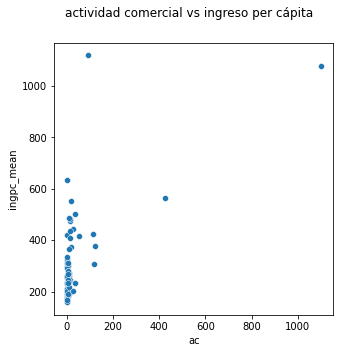

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
_ = sns.scatterplot(data=df, x='ac', y='ingpc_mean', ax=ax)
_ = fig.suptitle('actividad comercial vs ingreso per cápita')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
model = RandomForestRegressor(random_state=0)

In [ ]:
param_grid = {
    'n_estimators' : [50, 100, 150, 200, 250],
    'max_features' : ['auto','sqrt','log2'],
    'max_depth' : [10, 50, 100, 150, 200],
    'criterion' : ["squared_error", "absolute_error", "poisson"]
}

In [ ]:
grid = GridSearchCV(model, param_grid, cv=5)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [10, 50, 100, 150, 200],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [ ]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 50,
 'max_features': 'sqrt',
 'n_estimators': 250}

In [ ]:
model = RandomForestRegressor(criterion = 'absolute_error',
                              max_depth = 50,
                              max_features = 'sqrt',
                              n_estimators = 250)

In [ ]:
results = cross_val_score(model, X_train, y_train, cv=5)
print(f'{results.mean()} +- {results.std()}')

-0.016772870795292327 +- 0.1389273936656724


In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=50,
                      max_features='sqrt', n_estimators=250)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
model.score(X_test, y_test)

0.7343122873763916

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_predicted)

13730.976039429619

In [ ]:
mean_absolute_error(y_test, y_predicted)

93.46838634863272

In [ ]:
model.feature_importances_

array([0.64358954, 0.35641046])

¿Cuáles son las características que más influyen en la predicción del ingreso per cápita de un sector?

In [4]:
feature_importance = pd.DataFrame({'importance': [0.64358954, 0.35641046],
                                  'feature': ['pmc', 'ac']})

In [5]:
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

In [6]:
sns.set_theme(style='darkgrid')

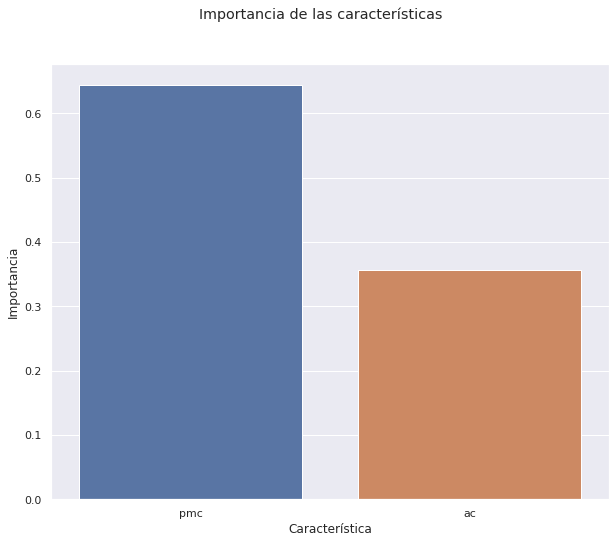

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
_ = sns.barplot(data=feature_importance, x='feature', y='importance', ax=ax)
_ = ax.set_xlabel('Característica')
_ = ax.set_ylabel('Importancia')
_ = fig.suptitle('Importancia de las características')